## Inicialización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats

## Carga del archivo de datos

In [ ]:
# Cargar los datos
games = pd.read_csv('/datasets/games.csv') 

## Prepara los datos

In [3]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9373,Hyperdimension Neptunia,PSV,2013.0,Role-Playing,0.05,0.00,0.07,0.01,NaN,NaN,NaN
11318,Princess Isabella: A Witch's Curse,DS,2010.0,Adventure,0.05,0.03,0.00,0.01,NaN,tbd,E
7996,Buffy the Vampire Slayer: Chaos Bleeds,PS2,2003.0,Action,0.09,0.07,0.00,0.02,72.0,8.9,T
1592,Pokemon XD: Gale of Darkness,GC,2005.0,Role-Playing,0.71,0.19,0.31,0.03,64.0,8.3,E
11440,Jikkyou Powerful Pro Yakyuu 15,Wii,2008.0,Sports,0.00,0.00,0.08,0.00,NaN,NaN,NaN
6572,Castlevania: Harmony of Dissonance,GBA,2002.0,Platform,0.16,0.06,0.04,0.00,87.0,8.2,T
6596,TOCA Race Driver 2: Ultimate Racing Simulator,PSP,2005.0,Racing,0.00,0.25,0.00,0.00,NaN,NaN,NaN
6956,NASCAR Thunder 2004,XB,2003.0,Racing,0.18,0.05,0.00,0.01,85.0,9.1,E
3971,Hidden Mysteries: Titanic - Secrets of the Fat...,DS,2009.0,Adventure,0.12,0.32,0.00,0.06,NaN,NaN,NaN
12495,Mobile Suit Gundam 00: Gundam Meisters,PS2,2008.0,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN


In [ ]:
# Ver info del df
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Nombres de columnas en formato snake_case
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
# Checar valores ausentes 
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
# Eliminar NaN
# Estas columnas representan muy pocas filas si se compara con el total
games.dropna(subset=['year_of_release', 'name', 'genre'], inplace=True)

In [ ]:
# Imputar NaN 
games['critic_score'].fillna(-1, inplace=True)
games['user_score'].fillna(-1, inplace=True)

In [ ]:
# Imputar NaN
games['rating'].fillna('No clasificado', inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [ ]:
# Checar valores ausentes engañosos
tbd_count = games[games['user_score'] == 'tbd']['genre'].count()
print(f"Número de valores 'TBD' en 'user_score': {tbd_count}")

Número de valores 'TBD' en 'user_score': 2376


In [ ]:
# Imputar valores ausentes engañosos
games['user_score'] = games['user_score'].replace('tbd', -1)
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8498,Tom and Jerry: Infurnal Escape,GBA,2003.0,Action,0.12,0.04,0.00,0.00,-1.0,-1,No clasificado
8087,"The Chronicles of Narnia: The Lion, The Witch ...",DS,2005.0,Action,0.15,0.01,0.00,0.01,65.0,7.5,E10+
10136,Capcom vs. SNK 2 EO,GC,2002.0,Fighting,0.09,0.02,0.00,0.00,68.0,8.9,T
12384,The Amazing Spider-Man 2 (2014),3DS,2014.0,Action,0.03,0.03,0.00,0.01,-1.0,-1,No clasificado
16107,Legoland,PC,1999.0,Action,0.00,0.01,0.00,0.00,-1.0,-1,No clasificado
141,Kinect Sports,X360,2010.0,Sports,3.92,1.73,0.03,0.51,73.0,7.4,E10+
8493,Stronghold 3,PC,2011.0,Strategy,0.06,0.10,0.00,0.00,47.0,3,T
4311,Brain Challenge,DS,2008.0,Misc,0.41,0.00,0.00,0.03,68.0,7,E
14776,Disney Sports Soccer,GBA,2002.0,Sports,0.02,0.01,0.00,0.00,68.0,-1,E
11350,Famicom Mini: Adventure Island,GBA,2004.0,Action,0.00,0.00,0.08,0.00,-1.0,-1,No clasificado


In [ ]:
# Convertir columnas al tipo correcto
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('float64')
games['user_score'] = games['user_score'].astype('float64')
games['rating'] = games['rating'].astype('category')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  object  
 2   year_of_release  16444 non-null  Int64   
 3   genre            16444 non-null  object  
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     16444 non-null  float64 
 9   user_score       16444 non-null  float64 
 10  rating           16444 non-null  category
dtypes: Int64(1), category(1), float64(6), object(3)
memory usage: 1.4+ MB


In [ ]:
# Obtener el total de ventas, incluyendo todas las regiones
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12176,Shin Chan: Las Nuevas Aventuras Para Wii!,Wii,2006,Action,0.00,0.00,0.07,0.00,-1.0,-1.0,No clasificado,0.07
15559,Mini Ninjas,PC,2009,Action,0.00,0.02,0.00,0.00,74.0,8.3,E10+,0.02
11930,Pro Farm 1,PC,2011,Simulation,0.00,0.06,0.00,0.01,-1.0,-1.0,No clasificado,0.07
5231,Tiger Woods PGA Tour 09,PSP,2008,Sports,0.07,0.18,0.00,0.10,53.0,5.5,E,0.35
15371,Resident Evil Zero,PC,2016,Action,0.01,0.01,0.00,0.00,-1.0,-1.0,No clasificado,0.02
161,Forza Motorsport 3,X360,2009,Racing,2.99,1.90,0.10,0.50,92.0,8.0,E,5.49
12452,Jewel Quest IV: Heritage,DS,2011,Puzzle,0.00,0.05,0.00,0.01,-1.0,-1.0,E,0.06
4067,FIFA Soccer 09,DS,2008,Sports,0.12,0.31,0.00,0.06,84.0,6.1,E,0.49
7275,Scooby-Doo! Mystery Mayhem,GC,2004,Action,0.17,0.04,0.00,0.01,-1.0,-1.0,No clasificado,0.22
9702,Wild ARMs 5 (jp sales),PS2,2006,Role-Playing,0.00,0.00,0.12,0.00,-1.0,-1.0,No clasificado,0.12


In [ ]:
filtered_games = games[(games['critic_score'] != -1) & (games['user_score'] != -1)]
filtered_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6894 entries, 0 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             6894 non-null   object  
 1   platform         6894 non-null   object  
 2   year_of_release  6894 non-null   Int64   
 3   genre            6894 non-null   object  
 4   na_sales         6894 non-null   float64 
 5   eu_sales         6894 non-null   float64 
 6   jp_sales         6894 non-null   float64 
 7   other_sales      6894 non-null   float64 
 8   critic_score     6894 non-null   float64 
 9   user_score       6894 non-null   float64 
 10  rating           6894 non-null   category
 11  total_sales      6894 non-null   float64 
dtypes: Int64(1), category(1), float64(7), object(3)
memory usage: 660.1+ KB


In [15]:
filtered_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11695,Serious Sam 3: BFE,PC,2011,Shooter,0.01,0.05,0.00,0.01,72.0,8.2,No clasificado,0.07
6098,The Warriors,XB,2005,Action,0.21,0.06,0.00,0.01,85.0,8.2,M,0.28
13054,Bladestorm: Nightmare,XOne,2015,Action,0.03,0.02,0.00,0.00,48.0,7.1,T,0.05
6017,Trace Memory,DS,2005,Adventure,0.15,0.01,0.12,0.01,70.0,8.1,T,0.29
3430,SoulCalibur V,X360,2012,Fighting,0.39,0.13,0.02,0.04,77.0,6.2,T,0.58
12898,Enemy Front,PS3,2014,Shooter,0.01,0.04,0.00,0.01,43.0,6.0,M,0.06
2779,Namco Museum Remix,Wii,2007,Misc,0.68,0.00,0.00,0.05,49.0,6.3,E,0.73
1255,Call of Duty 3,PS3,2006,Shooter,0.60,0.62,0.03,0.26,80.0,6.9,T,1.51
8929,Ys: The Oath in Felghana,PSP,2010,Role-Playing,0.09,0.00,0.04,0.01,80.0,8.3,T,0.14
5581,Dead Rising 2: Off the Record,PS3,2011,Action,0.11,0.08,0.10,0.03,72.0,7.1,M,0.32


Antes de cambiar el tipo de datos en las columnas, tuve que darle tratamiento a los valores ausentes (NaN), lo que hice para cada columna fue lo siguiente:
- Eliminé las filas en donde las columnas 'year_of_release', 'name' y 'genre' tenían datos ausentes. Esto porque las columnas tenían 269, 2 y 2 valores ausentes respectivamente. Habiendo un total de filas de 16715, esto representaba un % muy pequeño.
- A las columnas 'critic_score' y 'user_score', les cambiélos NaN por -1. El -1 podría haber sido cualquier número, lo que quería conseguir es distinguirlos para después ignorarlos en el análisis. 
- A la columna 'rating' le puse una nueva categoría: No especificado. Para distinguirla de las demás.
- Agregué la columna total_sales.

Por último, cambié el tipo de datos de cuatro columnas:
- La columna 'year_of_release' se cambió a tipo entero, pues al final sus valores son años, no tiene caso que sean floats.
- Las columnas 'critic_score' y 'user_score' las cambié a tipo float, pues los scores son números con decimales.
- La columna 'rating' la cambié a categórica, pues sus valores son letras que representan diferentes categorías. 

## Analiza los datos

In [16]:
games_per_year = filtered_games['year_of_release'].value_counts().sort_index()
games_per_year.head(10)

1985      1
1988      1
1992      1
1994      1
1996      8
1997     14
1998     26
1999     30
2000    102
2001    256
Name: year_of_release, dtype: Int64

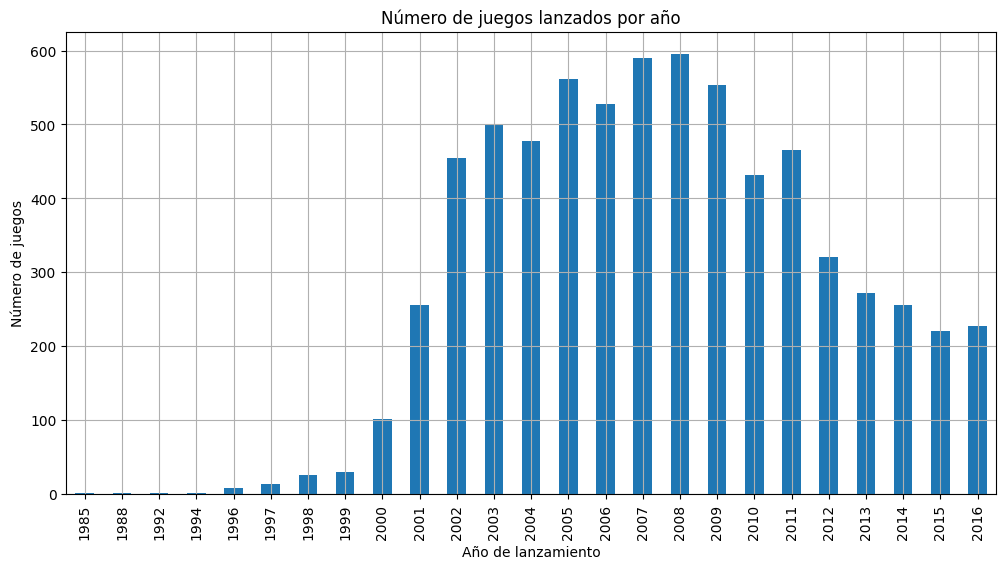

In [ ]:
# Graficar el número de juegos lanzados por año
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.grid(True)
plt.show()

In [ ]:
# Agrupar ventas por plataforma
filtered_platforms = filtered_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
filtered_platforms.head(10)

platform
PS2     946.01
X360    853.67
PS3     785.44
Wii     659.23
DS      382.88
PS4     244.27
XB      212.22
PS      209.98
PC      189.85
PSP     187.68
Name: total_sales, dtype: float64

In [19]:
top_platforms = filtered_platforms.head(8).index
top_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4', 'XB', 'PS'], dtype='object', name='platform')

In [ ]:
# Filtrar por top 8 plataformas en venta
filtered_top_platforms = filtered_games[filtered_games['platform'].isin(top_platforms)]
filtered_top_platforms.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1259,Madden NFL 2001,PS2,2000,Sports,1.19,0.07,0.05,0.20,91.0,7.7,E,1.51
1038,Madden NFL 2005,XB,2004,Sports,1.61,0.03,0.00,0.08,91.0,7.6,E,1.72
13976,Echo Night Beyond,PS2,2004,Adventure,0.02,0.01,0.00,0.00,60.0,8.8,T,0.03
5574,NBA Street V3,XB,2005,Sports,0.28,0.03,0.00,0.01,89.0,8.9,E,0.32
6047,Angry Birds Star Wars,PS3,2013,Strategy,0.10,0.14,0.00,0.05,49.0,3.6,E,0.29
6959,Harry Potter and the Goblet of Fire,XB,2005,Action,0.18,0.05,0.00,0.01,68.0,5.8,E10+,0.24
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
1452,Marvel vs. Capcom 3: Fate of Two Worlds,PS3,2011,Fighting,0.81,0.28,0.11,0.14,84.0,7.3,T,1.34
6105,R: Racing Evolution,PS2,2003,Racing,0.14,0.11,0.00,0.04,66.0,6.2,T,0.29
5011,Grandia Xtreme,PS2,2002,Role-Playing,0.07,0.05,0.25,0.02,68.0,6.5,T,0.39


In [ ]:
# Tabla dinámica ventas de las top 8 plataformas
pivot_table = filtered_top_platforms.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum',
    fill_value=0
)
pivot_table

platform,DS,PS,PS2,PS3,PS4,Wii,X360,XB
year_of_release,,,,,,,,
1994,0.00,1.26,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,17.73,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,31.93,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.00,45.17,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,48.98,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.00,45.66,29.50,0.00,0.00,0.00,0.00,0.99
2001,0.00,19.14,145.96,0.00,0.00,0.00,0.00,20.72
2002,0.00,0.11,169.99,0.00,0.00,0.00,0.00,40.24
2003,0.00,0.00,144.27,0.00,0.00,0.00,0.00,42.68


In [22]:
filtered_2000_ds = filtered_top_platforms[
    (filtered_top_platforms['year_of_release'] == 2000) &
    (filtered_top_platforms['platform'] == 'DS')
]
print(filtered_2000_ds)

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, total_sales]
Index: []


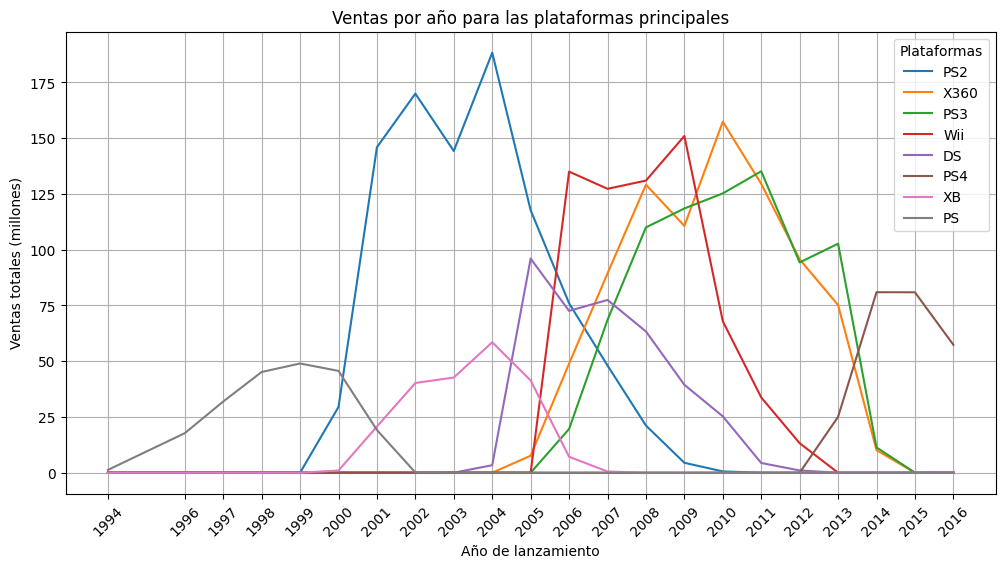

In [ ]:
# Gráfica de las ventas por año para las principales plataformas
pivot_table[top_platforms].plot(figsize=(12, 6))
plt.title('Ventas por año para las plataformas principales')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.xticks(ticks=pivot_table.index, labels=pivot_table.index, rotation=45)
plt.grid(True)
plt.legend(title='Plataformas')
plt.show()

- Caso Xbox y Xbox 360: Se puede ver que el Xbox empezó a vender en el 2000, tuvo su pico en el 2004 y terminó de cerrar su ciclo de ventas en el 2007. Esto tuvo mucho que ver el Xbox 360, pues empezó a tener sus ventas en el 2004, y poco a poco fue sustituyendo al Xbox y aumentando sus ventas, alcanzando su pico en el 2010 y cerrando su ciclo en el 2015. La transición de que una consola al uso de la nueva, duró 3 años. El ciclo del Xbox duró 7 años, mientras el del Xbox 360 duró 10 años. 
- Caso PlayStation: Las ventas del PS abarca de 1994 a 2002. Las ventas del PS2 de 1999 a 2010. La transición ocurrió de 1999 a 2002, duró 3 años. Las ventas del PS3 abarca del 2005 al 2015. La transición del 2 al 3 occurrió del 2005 al 2010, cuando terminaron las ventas del 2. Finalmente, las ventas del PS4 empezaron en el 2012 y empezaron a subir. La transición del PS3 al PS4 duró del 2012 al 2015.
- En general, las transiciones de una consola a la nueva, dura aproximadamente 3 años en lo que la antigua consola termina su ciclo de ventas y la nueva empieza a subir las ventas.
- En el principios de los años 2000, prácticamente eran dos plataformas: Xbox y PlayStation 2. Con PlayStation muy a la cabeza, teniendo aproximadamente 3 veces más ventas. A partir del año 2003, empiezan otras alternativas muy exitosas, con muchas ventas, como DS y Wii, además de PS y Xbox. Con ciclos del producto similares en cuestión de tiempo. Voy a hacer mi análisis a partir del 2007, para considerar tanto las nuevas alternativas, como las todavía más nuevas y alcanzar a visualizar las que están terminando su ciclo y las que están repuntando. 

In [24]:
relevant_data = filtered_games[filtered_games['year_of_release'] >= 2007]
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3933 entries, 2 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             3933 non-null   object  
 1   platform         3933 non-null   object  
 2   year_of_release  3933 non-null   Int64   
 3   genre            3933 non-null   object  
 4   na_sales         3933 non-null   float64 
 5   eu_sales         3933 non-null   float64 
 6   jp_sales         3933 non-null   float64 
 7   other_sales      3933 non-null   float64 
 8   critic_score     3933 non-null   float64 
 9   user_score       3933 non-null   float64 
 10  rating           3933 non-null   category
 11  total_sales      3933 non-null   float64 
dtypes: Int64(1), category(1), float64(7), object(3)
memory usage: 376.8+ KB


In [25]:
relevant_data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
3508,Titanfall 2,XOne,2016,Shooter,0.37,0.15,0.00,0.05,87.0,8.0,M,0.57
7092,Ys Seven,PSP,2009,Role-Playing,0.14,0.00,0.08,0.02,79.0,8.5,T,0.24
4120,Fortune Street,Wii,2011,Misc,0.25,0.03,0.17,0.02,68.0,7.5,E,0.47
975,Forza Motorsport 6,XOne,2015,Racing,0.73,0.90,0.03,0.14,87.0,7.9,E,1.80
8710,All-Pro Football 2K8,PS3,2007,Sports,0.14,0.00,0.00,0.01,73.0,7.3,E10+,0.15
360,Cooking Mama 2: Dinner With Friends,DS,2007,Simulation,1.60,1.49,0.10,0.39,70.0,8.0,E,3.58
11993,MLB Front Office Manager,X360,2009,Sports,0.06,0.00,0.00,0.01,47.0,4.6,E,0.07
5532,MX vs. ATV Untamed,Wii,2008,Racing,0.28,0.02,0.00,0.02,70.0,8.3,E,0.32
10155,Digimon Story: Cyber Sleuth,PS4,2016,Role-Playing,0.00,0.10,0.00,0.02,75.0,8.5,T,0.12
11883,Hearts of Iron III,PC,2009,Strategy,0.02,0.04,0.00,0.01,77.0,7.1,E10+,0.07


In [26]:
relevant_platform_data = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
relevant_platform_data

platform
X360    797.11
PS3     765.82
Wii     524.21
PS4     244.27
DS      210.91
PC      142.54
XOne    130.21
3DS     123.52
PSP     100.77
PS2      74.27
WiiU     66.08
PSV      30.83
XB        0.55
GC        0.22
Name: total_sales, dtype: float64

In [27]:
pivot_table_sales = relevant_data.pivot_table(
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum',
    fill_value = 0
)
pivot_table_sales 

platform,3DS,DS,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,
2007,0.00,77.47,0.22,8.91,48.08,68.52,0.00,35.53,0.00,127.31,0.00,89.39,0.55,0.00
2008,0.00,63.35,0.00,9.38,21.15,110.01,0.00,25.68,0.00,130.99,0.00,129.16,0.00,0.00
2009,0.00,39.42,0.00,15.47,4.45,118.50,0.00,20.46,0.00,151.01,0.00,110.67,0.00,0.00
2010,0.00,25.29,0.00,20.79,0.59,125.25,0.00,15.61,0.00,67.92,0.00,157.41,0.00,0.00
2011,44.03,4.36,0.00,31.19,0.00,135.18,0.00,3.34,3.88,33.75,0.00,129.53,0.00,0.00
2012,39.39,1.02,0.00,22.01,0.00,94.30,0.00,0.00,13.07,13.23,14.85,95.68,0.00,0.00
2013,15.89,0.00,0.00,10.98,0.00,102.70,25.07,0.15,5.96,0.00,17.40,75.17,0.00,14.92
2014,11.49,0.00,0.00,11.74,0.00,11.34,80.95,0.00,5.27,0.00,15.22,10.10,0.00,47.01
2015,10.55,0.00,0.00,7.18,0.00,0.02,80.90,0.00,1.72,0.00,15.35,0.00,0.00,44.58


In [28]:
top_sales_platforms = relevant_platform_data.head(8).index
top_sales_platforms

Index(['X360', 'PS3', 'Wii', 'PS4', 'DS', 'PC', 'XOne', '3DS'], dtype='object', name='platform')

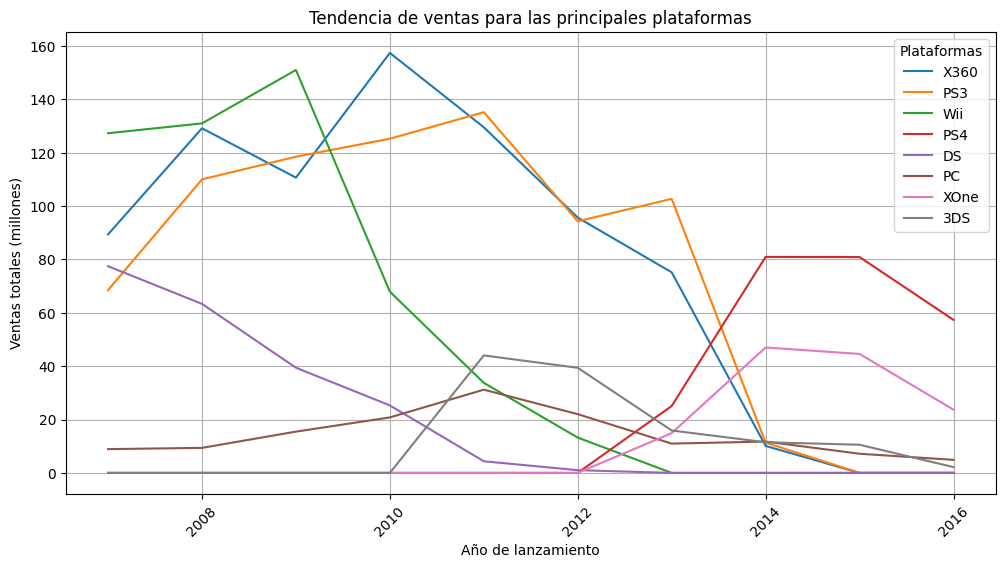

In [ ]:
# Graficar ventas para las principales plataformas del 2007 en adelante
plt.figure(figsize=(12, 6))
pivot_table_sales[top_sales_platforms].plot(ax=plt.gca())
plt.title('Tendencia de ventas para las principales plataformas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.legend(title='Plataformas')
plt.xticks(rotation=45)
plt.show()

Las compañías con más ventas en este periodo se dividen en dos grupos: las que están terminando su ciclo y las que apenas comienza. X360, PS3, Wii, PC, DS y 3DS están llegando a sus últimos años con ventas. En cambio, XOne y PS4, apenas empiezan a generar ventas y, considerando el éxito de estas 2 compañías cada que sacan un producto a la venta y su tendencia a la alta, son potencialmente rentables.

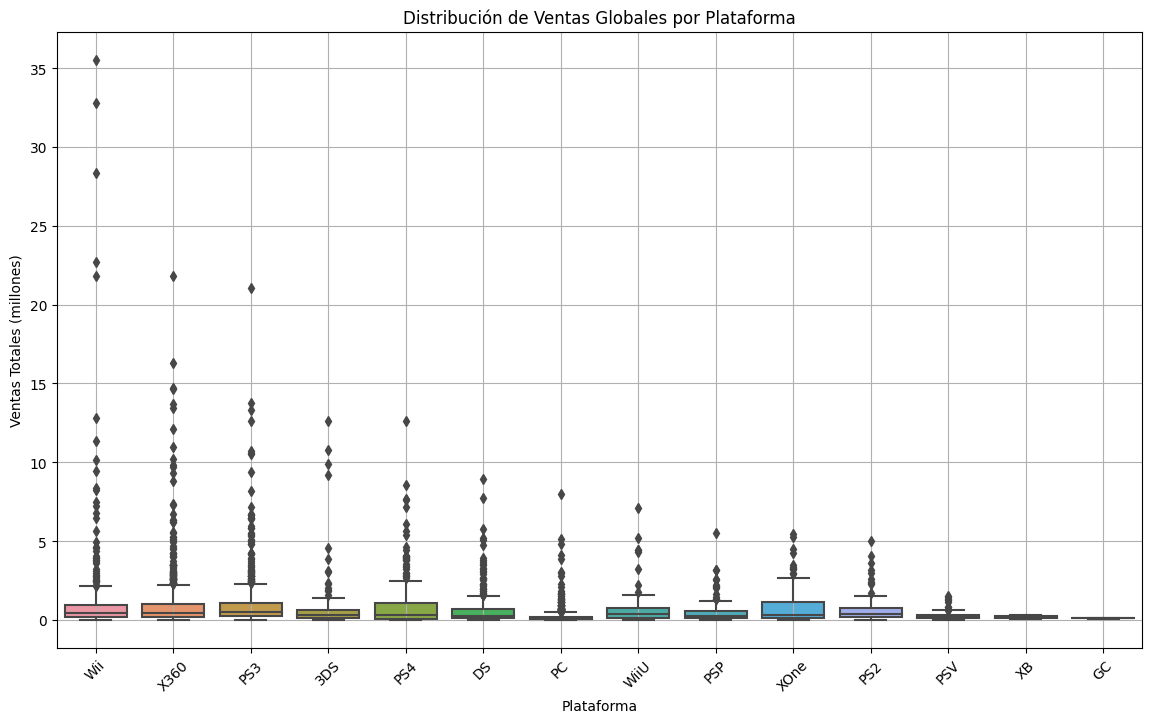

In [30]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=relevant_data)
plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

X360, y sobre todo Wii, tienen valores muy atípicos, lo que indica que ciertos videojuegos han tenido un éxito espectacular, rompiendo récords de venta. Con grandes ventas, pero en una menor medida en cuestión de valores atípicos, PS3, 3DS y PS4. Podemos ver que Wii, X360, PS3 y PS4 tienen medianas similares y más altas que otras plataformas, lo cual indica que en promedio tienen más ventas que sus competidores. También, podemos concluir que las ventas sí cambian significativamente de una plataforma a otra, basado en los valores atípicos de valores como Wii o X360 en comparación de las demás. Llama la atención de que a pesar de que X360 y PS3 tuvieron ventas con valores atípicos muy altos, siendo seguramente las dos consolas principales del mercado, a pesar de que tienen ventas relativamente altas, no demostraron esa gran dominancia para el PS4 y, sobre todo, el XOne, lo cual puede indicar una mayor competencia y/o un cambio en las preferencias de los consumidores. 

In [31]:
ps4_data = relevant_data[relevant_data['platform'] == 'PS4']
ps4_data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
8249,Toukiden Kiwami,PS4,2015,Action,0.05,0.07,0.02,0.02,74.0,7.6,T,0.16
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
14001,Assassin's Creed Chronicles: China,PS4,2015,Action,0.00,0.03,0.00,0.01,69.0,6.4,T,0.04
14404,Prison Architect,PS4,2016,Action,0.01,0.01,0.00,0.01,80.0,8.0,M,0.03
4033,Plants vs. Zombies: Garden Warfare 2,PS4,2016,Shooter,0.20,0.21,0.00,0.08,81.0,7.7,E10+,0.49
11761,Grand Ages: Medieval,PS4,2015,Strategy,0.00,0.05,0.02,0.01,64.0,7.1,T,0.08
14159,Infamous: First Light,PS4,2014,Action,0.00,0.03,0.00,0.00,73.0,7.5,T,0.03
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,No clasificado,0.01
976,The Evil Within,PS4,2014,Action,0.55,0.86,0.11,0.27,75.0,7.3,M,1.79
8886,The King of Fighters XIV,PS4,2016,Fighting,0.07,0.02,0.04,0.02,79.0,8.7,T,0.15


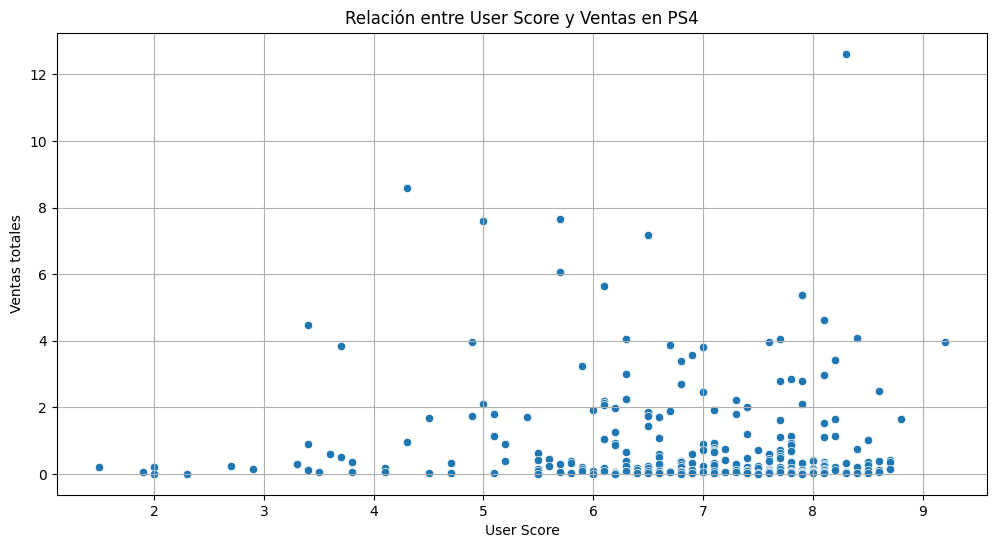

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data)
plt.title('Relación entre User Score y Ventas en PS4')
plt.xlabel('User Score')
plt.ylabel('Ventas totales')
plt.grid(True)
plt.show()

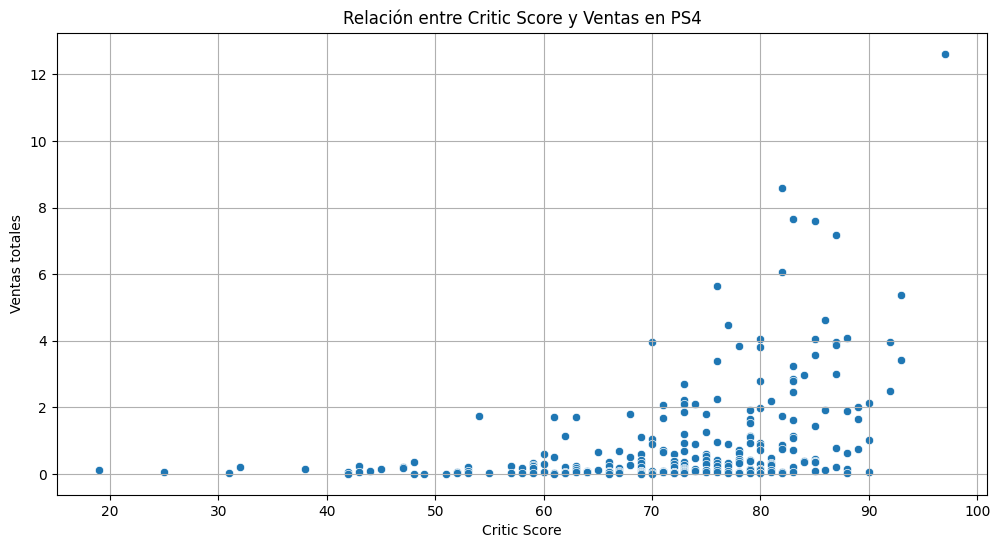

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data)
plt.title('Relación entre Critic Score y Ventas en PS4')
plt.xlabel('Critic Score')
plt.ylabel('Ventas totales')
plt.grid(True)
plt.show()

In [34]:
correlation_user_score = ps4_data['user_score'].corr(ps4_data['total_sales'])
correlation_critic_score = ps4_data['critic_score'].corr(ps4_data['total_sales'])

print(f"Correlación entre User Score y Ventas: {correlation_user_score:.2f}")
print(f"Correlación entre Critic Score y Ventas: {correlation_critic_score:.2f}")

Correlación entre User Score y Ventas: -0.03
Correlación entre Critic Score y Ventas: 0.41


- Analizando la relación entre User Score y Ventas:

A pesar de que, viendo la gráfica de dispersión, parece que muestre que haya ventas un poco mayores para juegos con score de 7 o más, esto no es suficiente para demostrar una correlación. Se obtuvo una correlación de -0.03, lo que indica una correlación prácticamente nula, el user score no es un factor que afecte a las ventas. Esto podría tener muchas razones, por ejemplo, que la opinión de los usuarios esté sesgada a sus gustos y experiencia previa en otros video juegos. También, al parecer, los compradores le dan importancia a otras cosas, como tal vez lo sea el marketing.

- Analizando la relación entre Critic Score y ventas:

Analizando la gráfica de dispersión, nos damos cuenta de que las ventas tienden a ser mayores a partir de calificaciones de 70. Lo que indica una mayor tendencia, comparado con el User Score. Esto lo confirmamos al obtener una correlación positica de 0.41, lo que indica una ligera correlación entre las dos variables, confirmando que el Critic Score tiene un impacto en las ventas. Esto puede ser explicado por muchas razones, por ejemplo, a que a los críticos se les vea como más objetivos o a que tengan una mayor difusión, se invierta más en hacer llegar este score al público. 

In [35]:
game_platform_sales = relevant_data.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
game_platform_sales.sample(10)

,name,platform,total_sales
3888,Your Shape: Fitness Evolved,X360,1.31
3538,Tom Clancy's The Division,PC,0.41
2466,Plants vs. Zombies: Garden Warfare,PS4,0.61
2257,Naruto Shippuden: Clash of Ninja Revolution 3,Wii,0.51
2891,Shovel Knight,WiiU,0.10
310,Bionicle Heroes,Wii,0.03
1006,F.E.A.R.,PS3,0.54
1735,Legendary,X360,0.26
3402,The Sims 2: Castaway,DS,0.72
1011,F.E.A.R. 3,PS3,0.45


In [36]:
pivot_table_sales = game_platform_sales.pivot_table(
    index='name',
    columns='platform', 
    values='total_sales',
    fill_value=0
)
pivot_table_sales.sample(10)

platform,3DS,DS,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,
Brothers in Arms: Hell's Highway,0.0,0.0,0.0,0.02,0.0,0.93,0.00,0.0,0.0,0.00,0.0,0.86,0.0,0.00
FIFA 14,0.0,0.0,0.0,0.40,0.0,6.46,3.01,0.0,0.0,0.00,0.0,4.22,0.0,1.16
Backyard Baseball '09,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.04,0.0,0.00,0.0,0.00
Your Shape: Fitness Evolved,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,1.31,0.0,0.00
America's Army: True Soldiers,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.09,0.0,0.00
WWE SmackDown vs. Raw 2011,0.0,0.0,0.0,0.00,0.0,1.09,0.00,0.0,0.0,0.00,0.0,0.87,0.0,0.00
Borderlands: The Handsome Collection,0.0,0.0,0.0,0.00,0.0,0.00,0.88,0.0,0.0,0.00,0.0,0.00,0.0,0.43
Mass Effect 3,0.0,0.0,0.0,0.96,0.0,1.42,0.00,0.0,0.0,0.00,0.0,3.05,0.0,0.00
Halo 5: Guardians,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,4.49


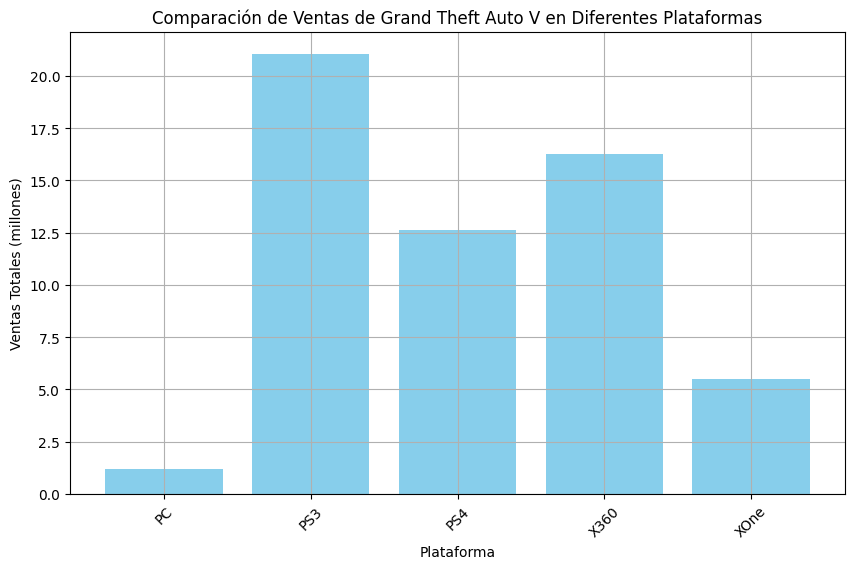

In [37]:
juego_seleccionado = 'Grand Theft Auto V'  
ventas_juego = game_platform_sales[game_platform_sales['name'] == juego_seleccionado]

plt.figure(figsize=(10, 6))
plt.bar(ventas_juego['platform'], ventas_juego['total_sales'], color='skyblue')
plt.title(f'Comparación de Ventas de {juego_seleccionado} en Diferentes Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Como podemos ver, el éxito del juego sí varía según la plataforma, lo cual se puede apreciar en la tabla dinámica. Me llamó la atención que, normalmente, PS compite con Xbox en las ventas, lo cual lo podemos ver cuando hice una gráfica del juego Grand Theft Auto 5, un juego muy popular que tuvo muchas ventas. Este juego tuvo su apogeo en la época del PS3 vs X360, y después, pues en estas plataformas fue donde tuvo mayores ventas, después continuó teniendo ventas durante la época del PS4 vs Xone, durante la transición de las plataformas. Revisando samples de la tabla dinámica, me llamó la atención que Wii tiene ventas récord en ciertos juegos, los cuales son exclusivos de la plataforma. Por ejemplo, el Wii Sports Resort, únicamente tiene ventas en Wii y son de 32.77, ventas muy altas. Esto confirma lo mencionado anteriormente, pues ahora hay más competencia y Wii se presentó como una alternativa muy fuerte. 

In [38]:
genre_sales = relevant_data.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
genre_sales.head(10)

,genre,total_sales
0,Action,798.02
8,Shooter,594.82
10,Sports,460.01
7,Role-Playing,299.95
3,Misc,285.34
6,Racing,213.05
4,Platform,186.74
2,Fighting,132.13
9,Simulation,104.06
1,Adventure,52.16


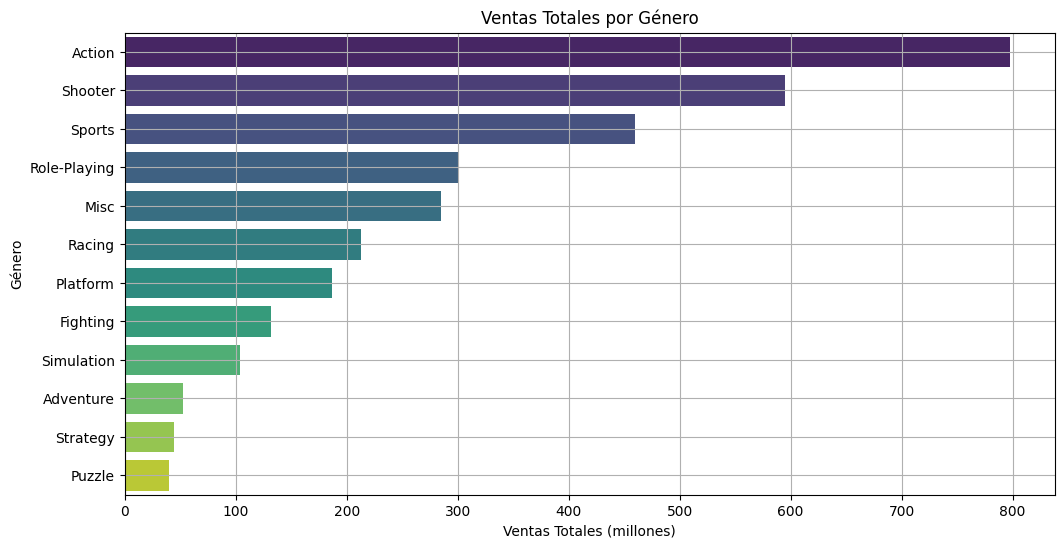

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='genre', data=genre_sales, palette='viridis')
plt.title('Ventas Totales por Género')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Género')
plt.grid(True)
plt.show()

In [40]:
genre_game_sales = relevant_data.groupby(['genre', 'name'])['total_sales'].sum().reset_index()
avg_sales_per_genre = genre_game_sales.groupby('genre')['total_sales'].mean().reset_index().sort_values(by='total_sales', ascending=False)
avg_sales_per_genre.head(10)

,genre,total_sales
8,Shooter,2.253106
10,Sports,1.847430
4,Platform,1.778476
3,Misc,1.585222
0,Action,1.511402
6,Racing,1.510993
2,Fighting,1.083033
7,Role-Playing,0.882206
9,Simulation,0.812969
5,Puzzle,0.621231


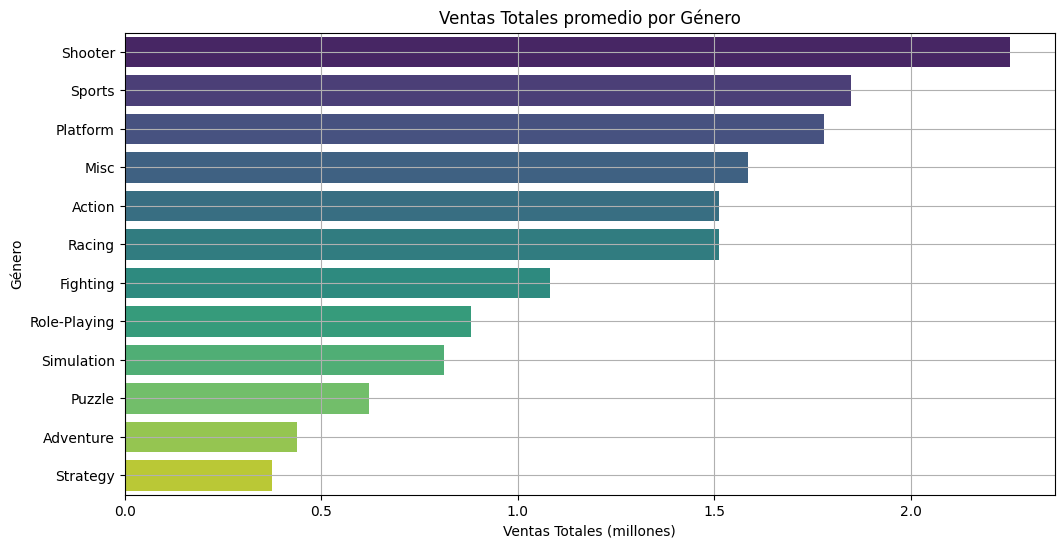

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='genre', data=avg_sales_per_genre, palette='viridis')
plt.title('Ventas Totales promedio por Género')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Género')
plt.grid(True)
plt.show()

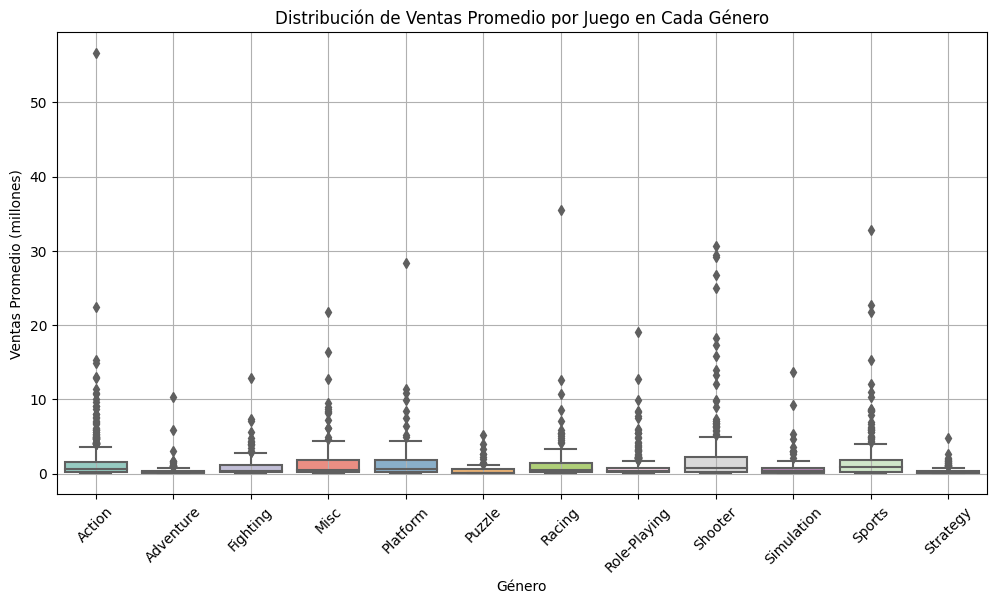

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=genre_game_sales, palette='Set3')
plt.xticks(rotation=45)
plt.title('Distribución de Ventas Promedio por Juego en Cada Género')
plt.xlabel('Género')
plt.ylabel('Ventas Promedio (millones)')
plt.grid(True)
plt.show()

Action, Shooter y Sports, son los 3 principales géneros, los que más venden, con diferencia. Después, calculando las ventas promedio, se puede ver que tanto Shooter como Sports se mantienen en los primeros dos lugares. Sin embargo, Action cae al 5to puesto, lo cual quiere decir que, a pesar de que Action tiene el mayor número de ventas, no tiene un promedio tan bueno como las otras dos categorías, lo que significa que Action tiene un mayor número de juegos, lo que la convierte en la categoría con más ventas. Finalmente, en el diagrama de caja y bigotes, vemos que Sports tiene la mediana más alta, seguido de Action y Shooter. En general, esto significa que tienen buenas ventas en promedio. Hay que considerar que también tienen muchos valores atípicos, sobre todo Shooter y Sports, lo que aporta mucho a las ventas totales e incrementa su promedio, pues hay ciertos juegos que tuvieron un éxito muy significativo.

## Perfil de usuario para cada región

In [ ]:
# Top 5 ventas de plataformas por región 
platform_sales_na = relevant_data.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)
platform_sales_eu = relevant_data.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)
platform_sales_jp = relevant_data.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print("Top 5 plataformas en NA:\n", platform_sales_na)
print("\nTop 5 plataformas en UE:\n", platform_sales_eu)
print("\nTop 5 plataformas en JP:\n", platform_sales_jp)

Top 5 plataformas en NA:
    platform  na_sales
11     X360    493.48
5       PS3    333.41
9       Wii    273.74
1        DS    104.85
6       PS4     84.46

Top 5 plataformas en UE:
    platform  eu_sales
5       PS3    267.15
11     X360    224.28
9       Wii    160.55
6       PS4    112.44
3        PC     85.87

Top 5 plataformas en JP:
   platform  jp_sales
5      PS3     53.91
9      Wii     43.75
1       DS     40.28
0      3DS     33.87
7      PSP     20.56


In [ ]:
# Comparación en ventas por región
platform_comparison = pd.DataFrame({
    'NA': platform_sales_na.set_index('platform')['na_sales'],
    'EU': platform_sales_eu.set_index('platform')['eu_sales'],
    'JP': platform_sales_jp.set_index('platform')['jp_sales']
}).fillna(0)
platform_comparison

,NA,EU,JP
platform,,,
3DS,0.00,0.00,33.87
DS,104.85,0.00,40.28
PC,0.00,85.87,0.00
PS3,333.41,267.15,53.91
PS4,84.46,112.44,0.00
PSP,0.00,0.00,20.56
Wii,273.74,160.55,43.75
X360,493.48,224.28,0.00


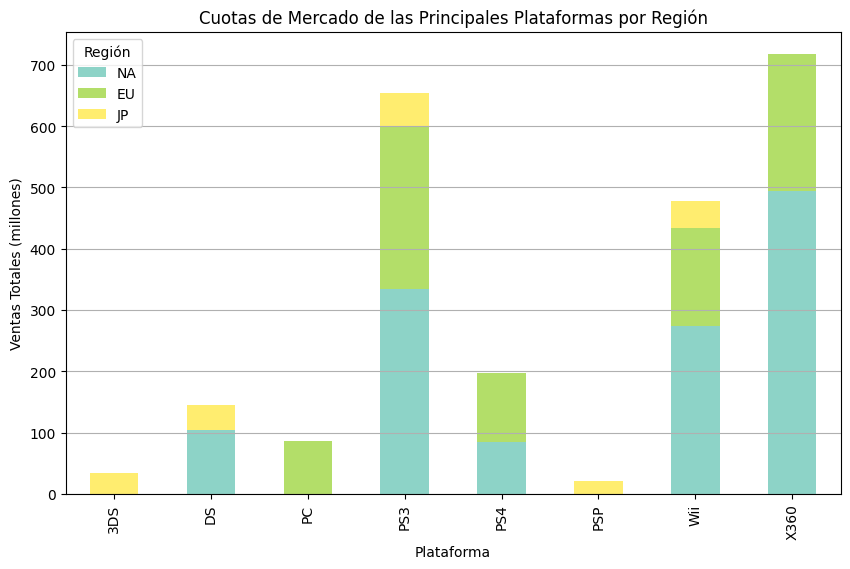

In [ ]:
# Graficar comparación en ventas por región
platform_comparison.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Cuotas de Mercado de las Principales Plataformas por Región')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Región')
plt.grid(axis='y')
plt.show()

Podemos ver que tanto en X360, como en PS3 y Wii, tuvieron mucho más ventas en NA y EU, sin embargo, llama la atención de que en ambos casos, NA contribuye en más del 50%. Japón, al ser un país más pequeño, tiene menos ventas que NA y EU. También, es importante destacar que el mercado de NA y el de EU son muy similares, pues generalmente las mismas plataformas tienen altas ventas en estos mercados. Caso contrario a Japón, en donde su mercado está más inclinado a los video juegos portátiles como el 3DS, DS o PSP. 

In [ ]:
# Agrupación top 5 géneros por región
genre_sales_na = relevant_data.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)
genre_sales_eu = relevant_data.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)
genre_sales_jp = relevant_data.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print("Top 5 géneros en NA:\n", platform_sales_na)
print("\nTop 5 géneros en UE:\n", platform_sales_eu)
print("\nTop 5 géneros en JP:\n", platform_sales_jp)

Top 5 géneros en NA:
    platform  na_sales
11     X360    493.48
5       PS3    333.41
9       Wii    273.74
1        DS    104.85
6       PS4     84.46

Top 5 géneros en UE:
    platform  eu_sales
5       PS3    267.15
11     X360    224.28
9       Wii    160.55
6       PS4    112.44
3        PC     85.87

Top 5 géneros en JP:
   platform  jp_sales
5      PS3     53.91
9      Wii     43.75
1       DS     40.28
0      3DS     33.87
7      PSP     20.56


In [ ]:
# Comparación géneros con más ventas por región
genre_comparison = pd.DataFrame({
    'NA': genre_sales_na.set_index('genre')['na_sales'],
    'EU': genre_sales_eu.set_index('genre')['eu_sales'],
    'JP': genre_sales_jp.set_index('genre')['jp_sales']
}).fillna(0)
genre_comparison

,NA,EU,JP
genre,,,
Action,379.43,271.85,45.15
Misc,160.04,79.87,16.92
Platform,0.00,0.00,22.60
Racing,0.00,86.88,0.00
Role-Playing,131.96,0.00,65.32
Shooter,309.15,201.02,0.00
Sports,233.62,149.19,19.48


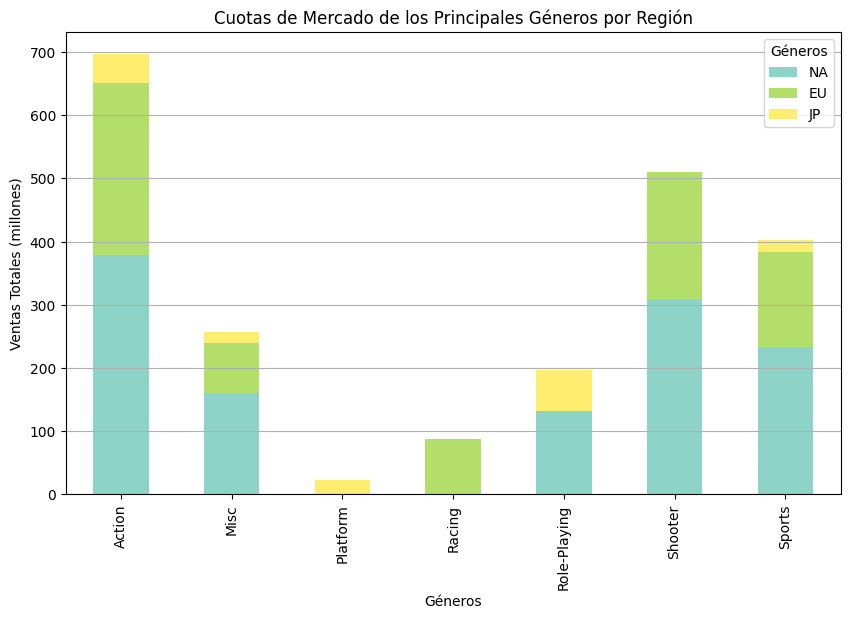

In [ ]:
# Graficar ventas en los principales géneros por región
genre_comparison.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Cuotas de Mercado de los Principales Géneros por Región')
plt.xlabel('Géneros')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Géneros')
plt.grid(axis='y')
plt.show()

El orden de las 3 categorías que más ventas tienen es el mismo en NA y EU, acción el primero, shooter el segundo y sports el tercero, lo cual indica similitud en el mercado de estas dos regiones. Es importante destacar que NA tiene más ventas en las 3 categorías. Al igual que con las plataformas, podemos ver que Japón consume video juegos de manera diferente. Teniendo Role-Playing en primer lugar y Platform en tercero. Esto nos demuestra las diferencias de las ventas por género según su región.

In [51]:
prueba = relevant_data['rating'].unique()
prueba

['E', 'M', 'T', 'E10+', 'No clasificado', 'RP']
Categories (6, object): ['E', 'M', 'T', 'E10+', 'No clasificado', 'RP']

In [ ]:
# Quitar filas 'No clasificado' para el análisis
esrb_data_filtered = relevant_data[~relevant_data['rating'].isin(['No clasificado', 'RP'])]
esrb_data_filtered.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62


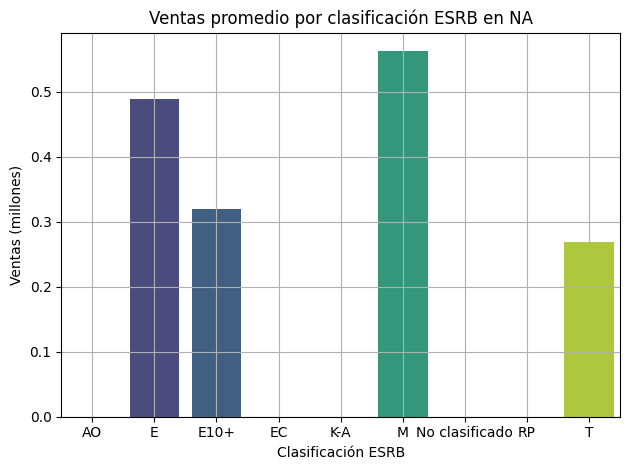

In [59]:
# Norteamérica (NA)
na_sales = esrb_data_filtered.groupby('rating')['na_sales'].mean()
sns.barplot(x=na_sales.index, y=na_sales.values, palette='viridis')
plt.title('Ventas promedio por clasificación ESRB en NA')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.grid(True)

plt.tight_layout()
plt.show()

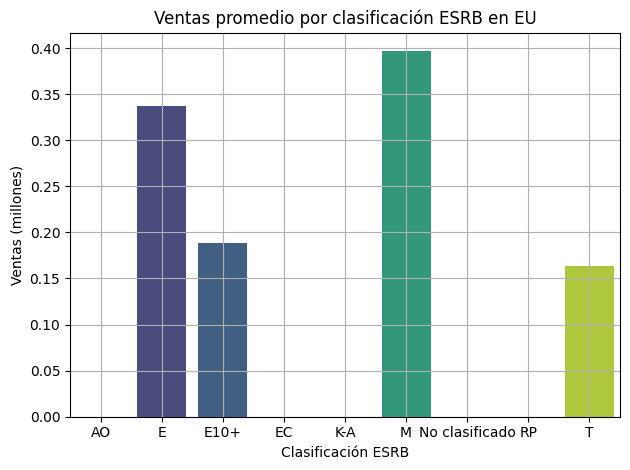

In [60]:
# Europa (EU)
eu_sales = esrb_data_filtered.groupby('rating')['eu_sales'].mean()
sns.barplot(x=eu_sales.index, y=eu_sales.values, palette='viridis')
plt.title('Ventas promedio por clasificación ESRB en EU')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.grid(True)

plt.tight_layout()
plt.show()

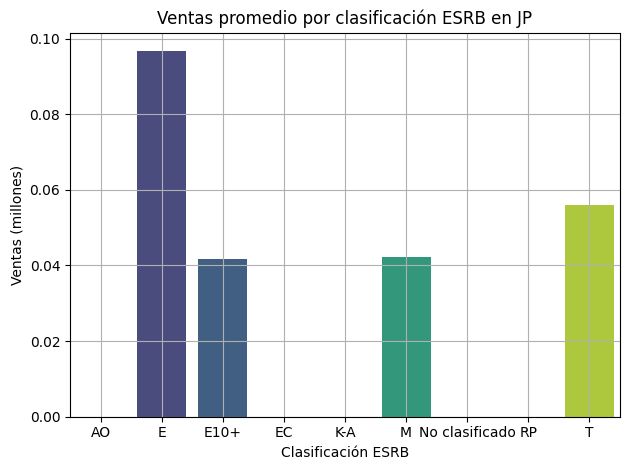

In [62]:
# Japón (JP)
jp_sales = esrb_data_filtered.groupby('rating')['jp_sales'].mean()
sns.barplot(x=jp_sales.index, y=jp_sales.values, palette='viridis')
plt.title('Ventas promedio por clasificación ESRB en JP')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.grid(True)

plt.tight_layout()
plt.show()

Una vez más, confirmamos la similitud entre el mercado EU y NA, teniendo el mismo orden en ventas promedio: M, E, E+10 y T. Japón muestra diferencias, pues E es con diferencia la categoría que más ventas promedio tiene y las otras 3 categorías presentan ventas no tan dispares, M no es una categoría tan importante en este país. 

## Pruebas de hipótesis

In [63]:
# Comparación de las calificaciones entre Xbox One y PC:
# Hipótesis nula (H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
# Hipótesis alternativa (Ha): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

xbox_scores = relevant_data[relevant_data['platform'] == 'XOne']['user_score']
pc_scores = relevant_data[relevant_data['platform'] == 'PC']['user_score']

# Prueba t de muestras independientes
t_stat, p_value = stats.ttest_ind(xbox_scores, pc_scores, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio entre Xbox One y PC.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente de una diferencia en las calificaciones promedio entre Xbox One y PC.")

T-statistic: -1.72, p-value: 0.0860
No se rechaza la hipótesis nula: no hay evidencia suficiente de una diferencia en las calificaciones promedio entre Xbox One y PC.


In [65]:
print(xbox_scores.mean())
print(pc_scores.mean())

6.538181818181818
6.7510396975425335


In [66]:
# Comparación de las calificaciones entre los géneros de Acción y Deportes:
# Hipótesis nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
# Hipótesis alternativa (Ha): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

accion_scores = relevant_data[relevant_data['genre'] == 'Action']['user_score']
deportes_scores = relevant_data[relevant_data['genre'] == 'Sports']['user_score']

# Prueba t de muestras independientes
t_stat, p_value = stats.ttest_ind(accion_scores, deportes_scores, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio entre los géneros de Acción y Deportes.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente de una diferencia en las calificaciones promedio entre los géneros de Acción y Deportes.")


T-statistic: 5.14, p-value: 0.0000
Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones promedio entre los géneros de Acción y Deportes.


In [67]:
print(accion_scores.mean())
print(deportes_scores.mean())

6.875785582255083
6.470798319327731


## Conclusión general

Primero que nada corregí errores en los nombres de las columnas y manejé los NaN. También, pude analizar las ventas de videojuegos desde 3 regiones diferentes para demostrar las diferencias de mercado, viendo si las calificaciones de los usuarios y los críticos impactaban a las ventas, así como las clasificaciones. También agrupé por género, plataforma y año de lanzamiento para encontrar patrones en las ventas. Finalmente, realicé dos pruebas de hipótesis. 